In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys
import copy
import matplotlib
%matplotlib inline
sys.path.append("..")
from demo_2_awac import och_2_awac

# all_paths = os.listdir('../20210124_SliderCabinetKnob_play/')
all_paths = ['../recordings/hardware_attempt2_CSK_0.pkl',
             '../recordings/hardware_attempt2_CSK_1.pkl',]
             
dat = []

for p in all_paths:
    dat_curr = pickle.load(open(p, 'rb'))
    dat += dat_curr
print(len(dat))


206


(97, 22)


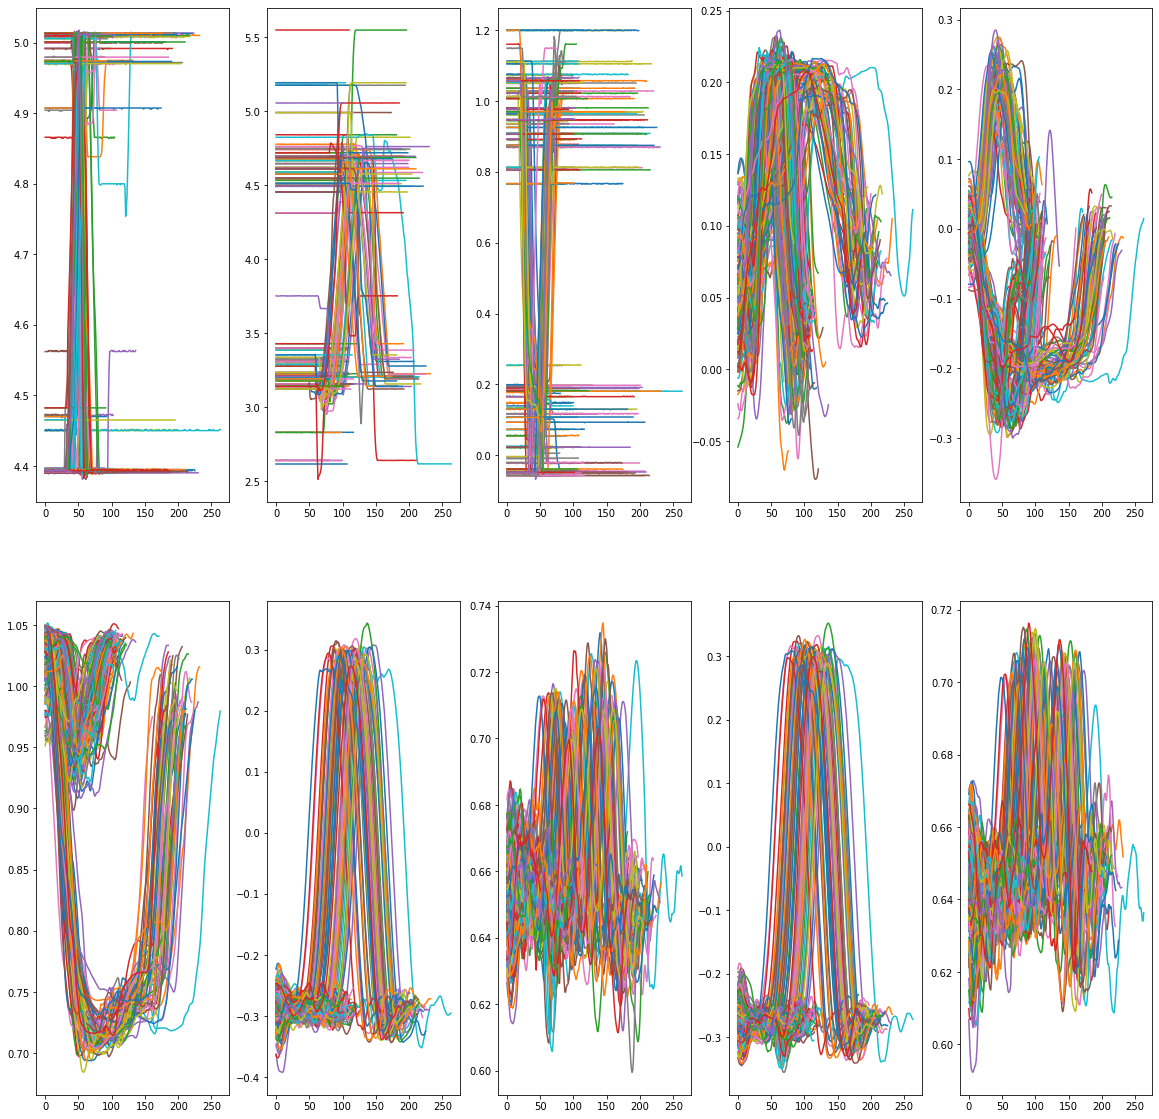

In [2]:
list_awac = och_2_awac(dat)
print(list_awac[0]['observations'].shape)
curr_x = 0
fig, ax = plt.subplots(2, 5, figsize=(20, 20))
for p in list_awac:
    for i in range(2):  
        for j in range(5):
            if i*5 +j == 1: 
                ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
            else:
                ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])

plt.show()

(97, 22)
(98, 22)
(196, 22)
(108, 22)
(199, 22)
(108, 22)
(99, 22)
(207, 22)
(105, 22)
(196, 22)
(101, 22)
(91, 22)
(213, 22)
(99, 22)
(104, 22)
(129, 22)
(201, 22)
(100, 22)
(96, 22)
(183, 22)
(81, 22)
(77, 22)
(182, 22)
(212, 22)
(100, 22)
(80, 22)
(99, 22)
(83, 22)
(202, 22)
(264, 22)
(107, 22)
(233, 22)
(123, 22)
(88, 22)
(231, 22)
(103, 22)
(225, 22)
(83, 22)
(112, 22)
(99, 22)
(110, 22)
(193, 22)
(69, 22)
(98, 22)
(204, 22)
(105, 22)
(108, 22)
(195, 22)
(114, 22)
(79, 22)
(208, 22)
(109, 22)
(110, 22)
(91, 22)
(96, 22)
(107, 22)
(221, 22)
(101, 22)
(93, 22)
(103, 22)
(117, 22)
(99, 22)
(197, 22)
(111, 22)
(103, 22)
(110, 22)
(200, 22)
(94, 22)
(218, 22)
(108, 22)
(119, 22)
(101, 22)
(105, 22)
(113, 22)
(137, 22)
(116, 22)
(198, 22)
(94, 22)
(105, 22)
(216, 22)
(96, 22)
(133, 22)
(81, 22)
(100, 22)
(109, 22)
(122, 22)
(208, 22)
(108, 22)
(89, 22)
(206, 22)
(226, 22)
(90, 22)
(99, 22)
(192, 22)
(84, 22)
(89, 22)
(162, 22)
(94, 22)
(70, 22)
(79, 22)
(93, 22)
(111, 22)
(216, 22)
(109

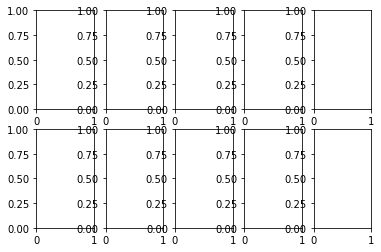

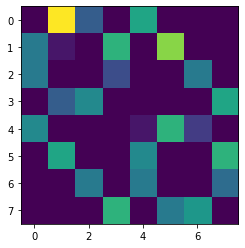

In [3]:
import itertools
def check_goal_completion(curr_pos):
    max_objs = np.array([4.8, 4.4, 0.7])
    min_objs = np.array([4.5, 3.6, 0.4])
    init_bitflips = np.array([0, 0, 0])
    curr_bitflips = init_bitflips.copy()
    for j in range(3):
        if curr_pos[j] > max_objs[j]:
            curr_bitflips[j] = 1
        elif curr_pos[j] < min_objs[j]:
            curr_bitflips[j] = 0
    new_idx = 4 * curr_bitflips[0] + 2*curr_bitflips[1] + curr_bitflips[2]
    return new_idx

def end_relabel(path):
    o_size = 11
    path['observations'][:, o_size:] = path['observations'][-1, :o_size].copy()
    path['next_observations'][:, o_size:] = path['observations'][-1, :o_size]
#     path['rewards'] = -np.linalg.norm(path['observations'][:, :3] - path['observations'][:, o_size:o_size+3], axis=-1)
    path['rewards'] = np.zeros_like(path['rewards'])
    path['rewards'][-1] = 1.0
    return path


list_awac = och_2_awac(dat)
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt 
curr_x = 0  
label_list = itertools.product(['SC', 'SO'], ['KC','KO'], ['CC', 'CO'])
tasks = ['-'.join(s) for s in label_list]
# tasks = ['CC', 'CO', 'OC', 'OO']
task_list = []
fig, ax = plt.subplots(2, 5)
adjacency_matrix = np.zeros((8, 8))
labeled_goals = [[] for _ in range(8)]
counts_starts = np.zeros(8)
counts_goals = np.zeros(8)
end_states = [None for _ in range(8)]
path_lists = [[[] for _ in range(8)] for _ in range(8)]

for i, path in enumerate(list_awac):
    end_relabel(path)
    print(path['observations'].shape)
    
for p in list_awac:
    curr_x += len(p['observations'])
    start_idx = check_goal_completion(p['observations'][0, :3])
    start = tasks[start_idx]
    end_idx = check_goal_completion(p['observations'][-1, :3])
    end = tasks[end_idx]
    adjacency_matrix[start_idx, end_idx] += 1
    path_lists[start_idx][end_idx].append(copy.deepcopy(p))
    task_list.append(check_goal_completion(p['observations'][-1, :3]))
    labeled_goals[end_idx].append(p['observations'][-1])
    counts_goals[end_idx] += 1
    counts_starts[start_idx] += 1
    if end_states[end_idx] is None:
        end_states[end_idx] = p['observations'][-1, :11]
#         fig, ax = plt.subplots(2, 5, figsize=(20, 20))
#         for i in range(2):  
#             for j in range(5):
#                 if i*5 +j == 1: 
#                     ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
#                 else:
#                     ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
#         plt.show()
#         import IPython
#         IPython.embed()
    
# print("INDEX " + str(check_goal_completion(list_awac[0]['observations'][-1, :2])))
# print("INDEX " + str(check_goal_completion(list_awac[1]['observations'][-1, :2])))
# print("INDEX " + str(check_goal_completion(list_awac[2]['observations'][-1, :2])))
# print("INDEX " + str(check_goal_completion(list_awac[3]['observations'][-1, :2])))
plt.show() 

plt.imshow(adjacency_matrix)
plt.show()

# plt.plot(task_list)
# plt.show()    
# print("INDEX " + str(check_goal_completion(list_awac[3]['observations'][-1, :2])))
# list_awac[3]['observations'][-1, :10]


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


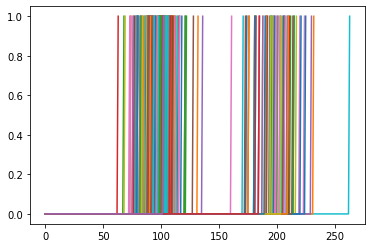

In [4]:
for path in list_awac:
    plt.plot(path['rewards'])
    print(np.sum(path['rewards']))

In [ ]:
def end_relabel(path):
    o_size = 11
    path['observations'][:, o_size:] = path['observations'][-1, :o_size].copy()
    path['next_observations'][:, o_size:] = path['observations'][-1, :o_size]
    path['rewards'] = np.zeros_like(path['rewards'])
    path['rewards'][-1] = 1.0
    return path

for i, path in enumerate(list_awac):
    end_relabel(path)
    print(path['observations'].shape)


In [5]:
new_path_list = []
for i in range(8):
    for j in range(8):
        if path_lists[i][j] != []:
            print("START %d END %d SIZE %d"%(i, j, len(path_lists[i][j])))
            new_path_list.extend(path_lists[i][j][:4])
print(new_path_list)

START 0 END 1 SIZE 17
START 0 END 2 SIZE 5
START 0 END 4 SIZE 10
START 1 END 0 SIZE 7
START 1 END 1 SIZE 1
START 1 END 3 SIZE 11
START 1 END 5 SIZE 14
START 2 END 0 SIZE 7
START 2 END 3 SIZE 4
START 2 END 6 SIZE 7
START 3 END 1 SIZE 5
START 3 END 2 SIZE 8
START 3 END 7 SIZE 10
START 4 END 0 SIZE 8
START 4 END 4 SIZE 1
START 4 END 5 SIZE 11
START 4 END 6 SIZE 3
START 5 END 1 SIZE 10
START 5 END 4 SIZE 8
START 5 END 7 SIZE 11
START 6 END 2 SIZE 7
START 6 END 4 SIZE 7
START 6 END 7 SIZE 6
START 7 END 3 SIZE 11
START 7 END 5 SIZE 7
START 7 END 6 SIZE 9
[{'observations': array([[ 4.39332104,  3.1461947 ,  0.17640778, ..., -0.28720571,
         0.64917308,  0.03750031],
       [ 4.39332104,  3.1461947 ,  0.17794177, ..., -0.28720571,
         0.64917308,  0.03750031],
       [ 4.39178705,  3.1461947 ,  0.17794177, ..., -0.28720571,
         0.64917308,  0.03750031],
       ...,
       [ 4.39332104,  3.1461947 ,  0.94646615, ..., -0.28720571,
         0.64917308,  0.03750031],
       [ 4.3933

In [6]:
pickle.dump(new_path_list, open('demo_list_hardware_cabinet_slider_knob_relabeled_cleanerknob_LESSDATA_4traj.pkl', 'wb'))

In [ ]:
pickle.dump(list_awac, open('demo_list_hardware_cabinet_slider_knob_relabeled_cleanerknob_densereward.pkl', 'wb'))

In [ ]:
for p in list_awac:
    fig, ax = plt.subplots(2, 5)
    for i in range(2):  
        for j in range(5):
            if i*5 +j == 1: 
                ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
            else:
                ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
plt.show()